In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

train_df.shape,test_df.shape

((4209, 378), (4209, 377))

In [4]:
import pickle

columns_array = train_df.drop(['y'], axis=1).columns.values

filename = 'Fitted_Object/column_mapping.sav'

pickle.dump(columns_array, open(filename, 'wb')) 

#### There are total 4209 rows in train and test csv file each and 378 and 377 features in train and test csv respectively.

In [5]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


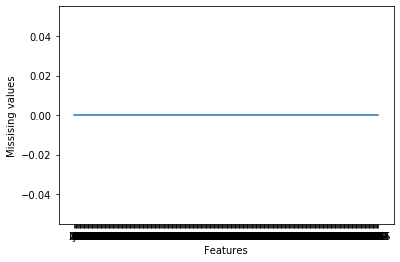

In [12]:
import matplotlib.pyplot as plt 
plt.plot(train_df.isnull().sum())
plt.xlabel("Features")
plt.ylabel("Missising values")
plt.title("")
plt.show()

### Observation

    1. Y is target variable which appears to continous random varaible.
    2. X0 - X8 seems are categorical features.
    3. X375- X385 are showing only one's and zero's values.
    4. ID consist of some discreate values lets.
    5. 1 Float, 396 int64, object 8  count for each dtype.
    6. There are no nan or missing values/Null values.
    
Lets try to explore further starting by knowing datatype of each variable.

In [16]:
### https://www.geeksforgeeks.org/python-pandas-dataframe-dtypes/
dtype_df = train_df.dtypes.reset_index()

dtype_df.columns = ['columns','columns types']

dtype_df.head(10)

,columns,columns types
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


In [8]:
int_dtype = train_df.dtypes[train_df.dtypes=='int64']
int_dtype = int_dtype.reset_index()
int_dtype.columns = ['feature','dtype']
int_dtype.head(10)

,feature,dtype
0,ID,int64
1,X10,int64
2,X11,int64
3,X12,int64
4,X13,int64
5,X14,int64
6,X15,int64
7,X16,int64
8,X17,int64
9,X18,int64


In [15]:
cate_dtype = train_df.dtypes[train_df.dtypes=='object']
cate_dtype = cate_dtype.reset_index()
cate_dtype.columns = ['feature','dtype']
cate_dtype

,feature,dtype
0,X0,object
1,X1,object
2,X2,object
3,X3,object
4,X4,object
5,X5,object
6,X6,object
7,X8,object


In [10]:
float_dtype = train_df.dtypes[train_df.dtypes=='float']
float_dtype = float_dtype.reset_index()
float_dtype.columns = ['feature','dtype']
float_dtype

,feature,dtype
0,y,float64


### Observation :
    1. Y is float variable.
    2. X0 - X8 are categorical features.
    3. X10 - X385 are int64 variable.
    4. From above dataFrame train_df and test_df it seems like the in64 dtype features only contains 1 and 0    value.
    
###   Let's investigate more on int feature.

In [11]:
"""
Here unique value in each feature are calculated, the feature's having same uniqe categories are clustered

together. The unique categories are stored as key of dictionary and all those columns belonging to same category

are added in that cluster in the form of list.

Here UniKvalue_feat dictionary is used to store the unique categories and corresponding features names are 

stored as values.

"""
### column containing the int as dtype
int_feat_column = int_dtype['feature'].values

unikValue_feat = dict()

unik_value = set()
## Iterate though all the features having int as dtype
for i in range(1,len(int_feat_column)):
    
    if str(list(np.sort(train_df[int_feat_column[i]].unique()))) not in unik_value:
        ## add unique value to the set if 
        unikValue_feat[str(list(np.sort(train_df[int_feat_column[i]].unique())))] = list()
    
    ## Add the unique values from columns in set 
    unik_value.add(str(list(np.sort(train_df[int_feat_column[i]].unique()))))
    
    ### Add the unique values as key and name of that feat as value in below dictionary
    unikValue_feat[str(list(np.sort(train_df[int_feat_column[i]].unique())))].append(int_feat_column[i]) 

In [12]:
print('The Unique Values in feat/columns are ::' ,unikValue_feat.keys())

The Unique Values in feat/columns are :: dict_keys(['[0, 1]', '[0]'])


In [13]:
for ele in unikValue_feat.keys():
    
    print("The unique values :: ", ele)
    
    print('-'*100)
    
    print('The columns/features containing above unique values are ::')
    
    print('-'*100)
    
    print(unikValue_feat[ele])
    
    print('\n')

The unique values ::  [0, 1]
----------------------------------------------------------------------------------------------------
The columns/features containing above unique values are ::
----------------------------------------------------------------------------------------------------
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X1

In [14]:
filename = 'Fitted_Object/unikValue_feat.sav'
pickle.dump(unikValue_feat, open(filename, 'wb'))

NameError: name 'pickle' is not defined


### The Numercial Feature broadly contains two types of columns:

1. The first type contains the values containing only 0 and 1's ('[0, 1]').
2. The secound type constitute of only one value, i.e. 0.
3. The secound type of adds no value to the Dataset as it has no variability to the Data and hence to the Model.
4. The ID feature is unique for each row in Dataset it's just index the total Dataset, hence is discarded.
5. Total Discarded Feature will be 13(Zeros valued feature) + 1 (ID) = 14.
    

#### Let's calculate the percentage of zeros in each feature 

In [15]:
## https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
"""
In integer featured there are some feature containing the unique categories as 0's and 1's.

So, to check the imabalance, here percentage of 0's share is calculated in each feature and stored in the 

dictionary called column_count as shown below.

column_count = {'X12': .90 , X13: .95 ...... so on}

percent_zero_in_feat = [.90,.95 ... so on for all feat with  0's and 1's as unique categories]

"""

column_count = dict()

percent_zero_in_feat = []

## Iterate over all the features which contains 0 and 1 value's
for i in  range(0, len(unikValue_feat['[0, 1]'])):
    ### col with contains zero one feature
    one_zero_feat = train_df[unikValue_feat['[0, 1]'][i]]
    ### calculate count of 0 and 1 in particular col
    unique, counts = np.unique(one_zero_feat, return_counts=True)
    ## Insert percentage of zero value in particular col
    column_count[unikValue_feat['[0, 1]'][i]] = counts[0]/4209
    
    percent_zero_in_feat.append(counts[0]/4209)

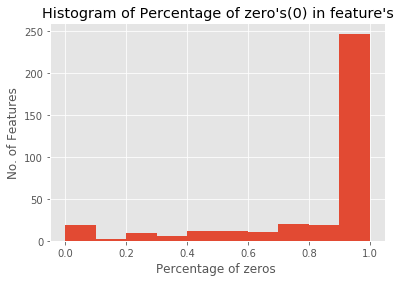

In [16]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.hist(percent_zero_in_feat)
plt.title("Histogram of Percentage of zero's(0) in feature's")
plt.xlabel('Percentage of zeros ')
plt.ylabel('No. of Features')
plt.show()

### Observation
    1. Most of the feat contains above 90 percent of zero value of total points.
    2. Percentage of zeros dominates the curve.
    3. But we cannot remove any columns based on the value shares(0's and 1's), as for algorithms like decision trees entropy is more important at that particulr size of data.
    4. These information can be used further if we need to discard some feature based on imbalance if required.
    

### Univariate Analysis on features

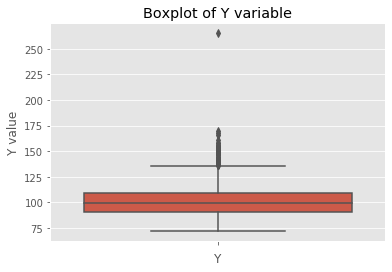

In [17]:
import seaborn as sns

sns.boxplot( y= 'y', data = train_df)
plt.title('Boxplot of Y variable')
plt.ylabel('Y value')
plt.xlabel('Y')
plt.show()

In [18]:
np.percentile(train_df.y.values,[25,75])

array([ 90.82, 109.01])

In [19]:
train_df.y.describe().reset_index()

,index,y
0,count,4209.000000
1,mean,100.669318
2,std,12.679381
3,min,72.110000
4,25%,90.820000
5,50%,99.150000
6,75%,109.010000
7,max,265.320000


In [20]:
train_df = train_df[train_df['y'] <= 136]

train_df.shape

(4159, 378)

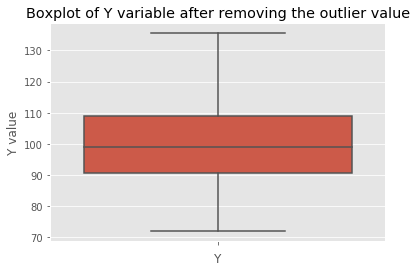

In [21]:
sns.boxplot( y= 'y', data = train_df)
plt.title('Boxplot of Y variable after removing the outlier value')
plt.ylabel('Y value')
plt.xlabel('Y')
plt.show()

### Observation

    There are no more points that are present outside the Quantile limit. We can say that Y variable is outlier free.

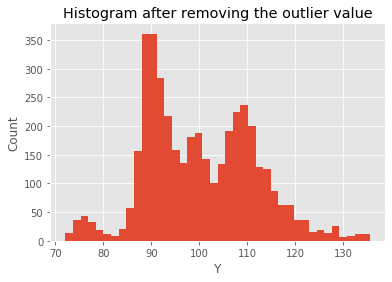

In [22]:
plt.hist(train_df['y'].values, bins=40)
plt.title("Histogram after removing the outlier value")
plt.xlabel('Y')
plt.ylabel('Count')
plt.show()

### Observation of Univariate on Y - Target Variable

1. The desrcibe method gives the summary of some statistics.
2. The 136 is the upper limit for the outlier in dependent variable Y.

### Visualisation and Outlier Treatment of  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [23]:
feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

### Plot of X0 vs y

Text(0.5, 0, 'The categories in feat :: X0')

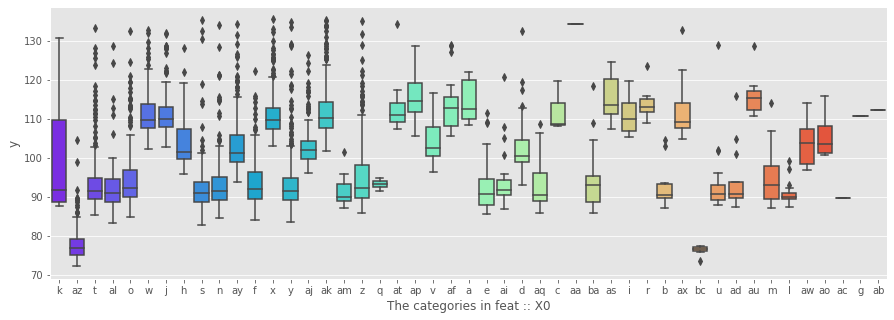

In [24]:
## https://datascienceplus.com/seaborn-categorical-plots-in-python/
var_name = 'X0'
plt.figure(figsize=(15,5))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories')
plt.xlabel('The categories in feat :: '+ feat[0])

In [25]:
print("The total number of categories in X0 ::",len(train_df['X0'].unique()))

The total number of categories in X0 :: 47


### Observation for X0

This plot is y vs categories in X0 feature. The x value represent's catgeories from X0 and the y value shows the boxplot for corresponding y value points.

There are total 47 categories in X0 as mentioned in the above cells. In some categories there outlier points upto some extent.

### Plot of X1 vs y

Text(0.5, 0, 'The categories in feat :: X1')

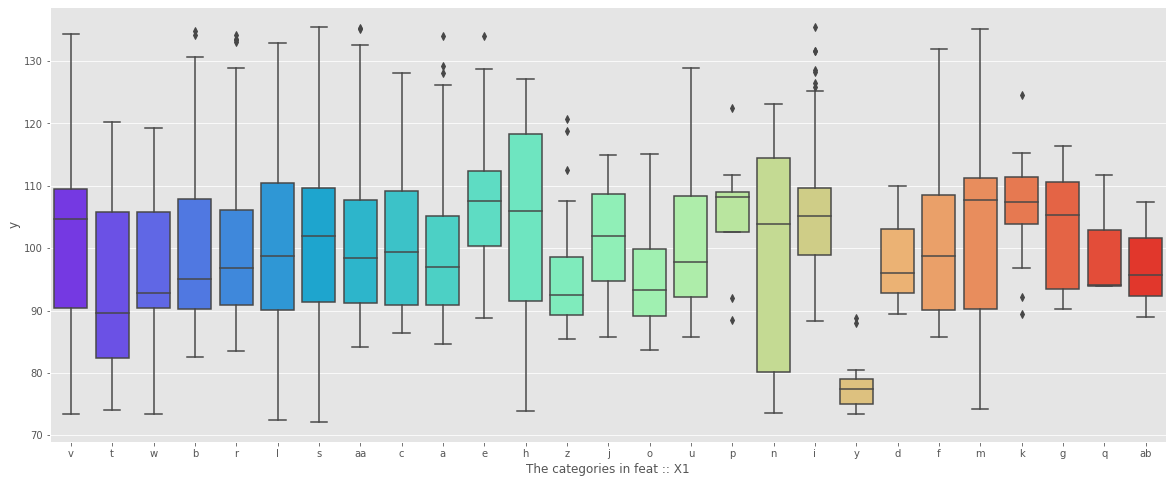

In [26]:
var_name = 'X1'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[1])

In [27]:
print("The total number of categories in X0 ::",len(train_df['X1'].unique()))

The total number of categories in X0 :: 27


### Observation for X1

This plot is y vs categories in X1 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 27 categories in X0 as mentioned in the above cells. There are many little number of outlier which can be ignored.

### Plot of X2 vs y

Text(0.5, 0, 'The categories in feat :: X2')

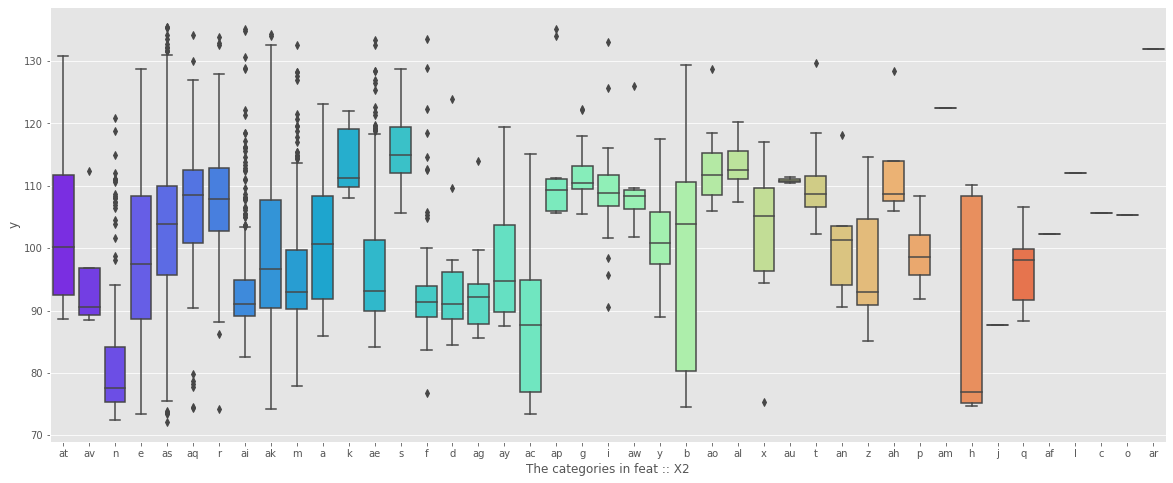

In [28]:
var_name = 'X2'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[2])

In [29]:
print("The total number of categories in X2 ::",len(train_df['X2'].unique()))

The total number of categories in X2 :: 43


### Observation for X2

This plot is y vs categories in X2 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 43 categories in X2 as mentioned in the above cells. 

### Plot of X3 vs y

Text(0.5, 0, 'The categories in feat :: X3')

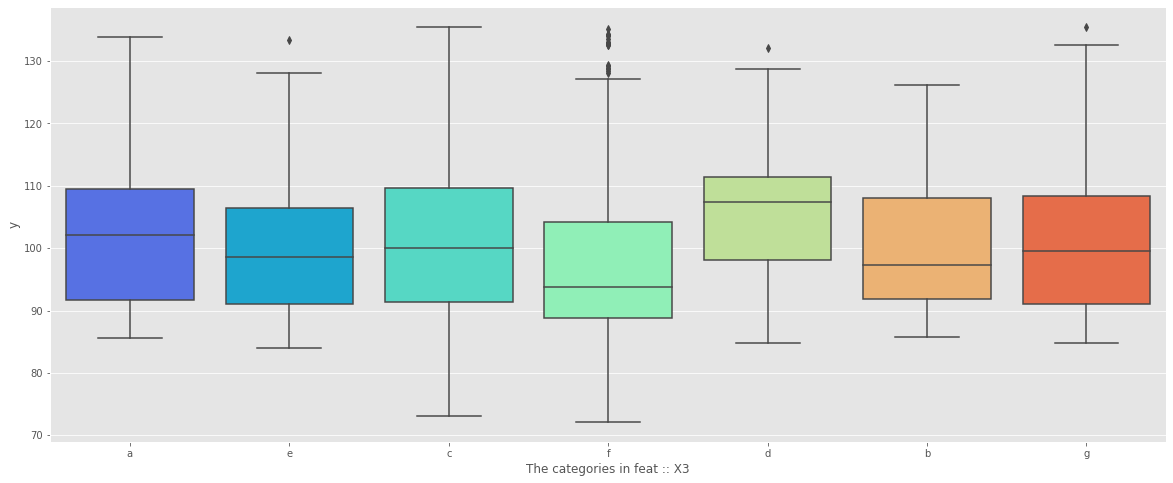

In [30]:
var_name = 'X3'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[3])

In [31]:
print("The total number of categories in X3 ::",len(train_df['X3'].unique()))

The total number of categories in X3 :: 7


### Observation for X3

This plot is y vs categories in X3 feature. The x value represent's catgeories from X3 and the y value shows the boxplot for corresponding y value points.

There are total 7 categories in X3 as mentioned in the above cells. The outlier are also less hence can be ignored.


Such type of setting is good for tree based Model provided having less entropy for given number of split.


### Plot of X4 vs y

Text(0.5, 0, 'The categories in feat :: X4')

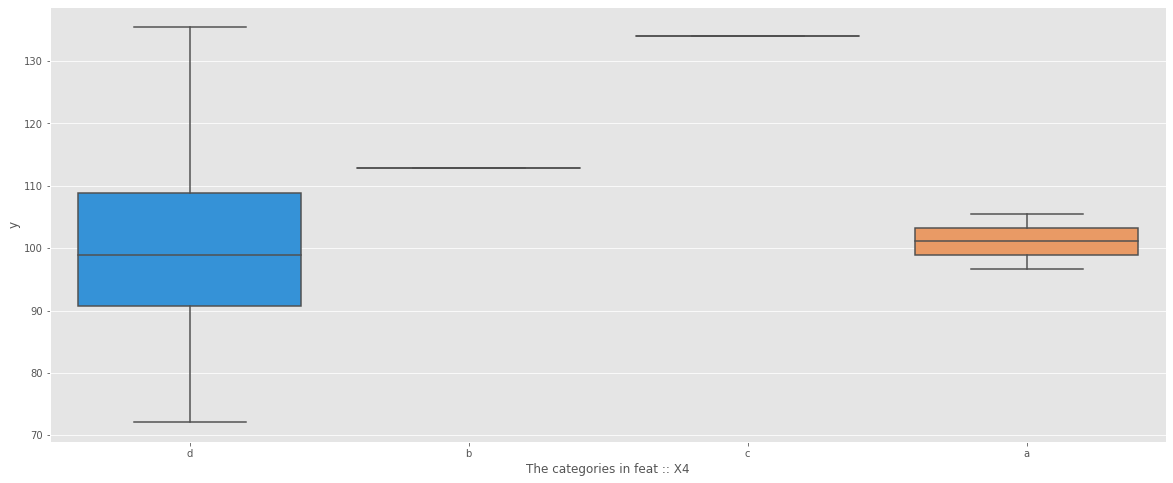

In [32]:
var_name = 'X4'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+  feat[4])

In [33]:
print("The total number of categories in X4 ::",len(train_df['X4'].unique()))

The total number of categories in X4 :: 4


### Observation for X4

This plot is y vs categories in X4 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 4 categories in X4 as mentioned in the above cells. 

There are very few values in some categories as can be seen from above plot.



### Plot of X5 vs y

Text(0.5, 0, 'The categories in feat :: X5')

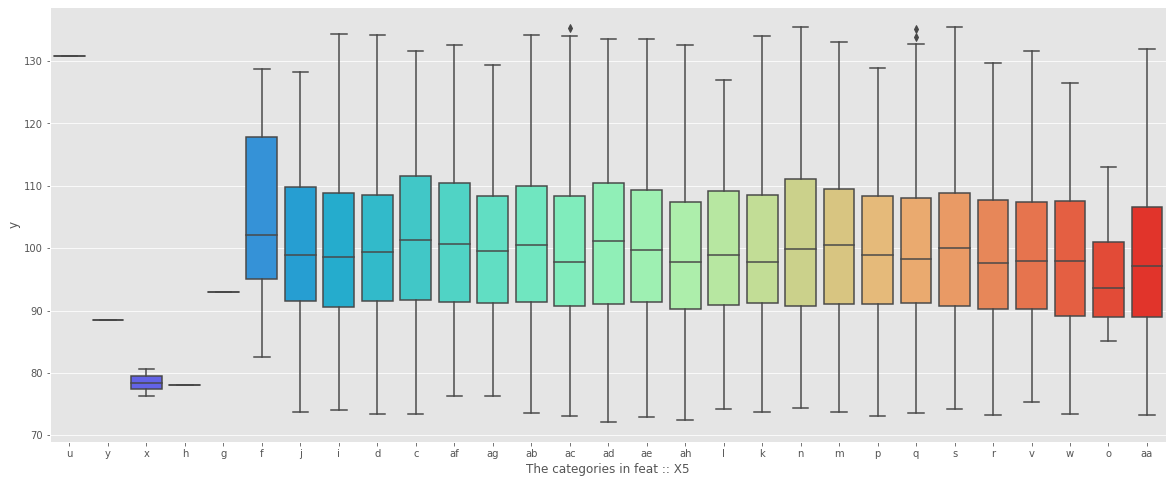

In [34]:

var_name = 'X5'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[5])

In [35]:
print("The total number of categories in X5 ::",len(train_df['X5'].unique()))

The total number of categories in X5 :: 29


### Observation for X5

This plot is y vs categories in X5 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 29 categories in X5 as mentioned in the above cells. 

There are very few values in some categories like u, y, h, g such things could create problem when we split the data in train and test split.

There can a case where no points among those categories are distributed in train and it directly comes in test so that can create a problem.

### Plot of X6 vs y

Text(0.5, 0, 'The categories in feat :: X6')

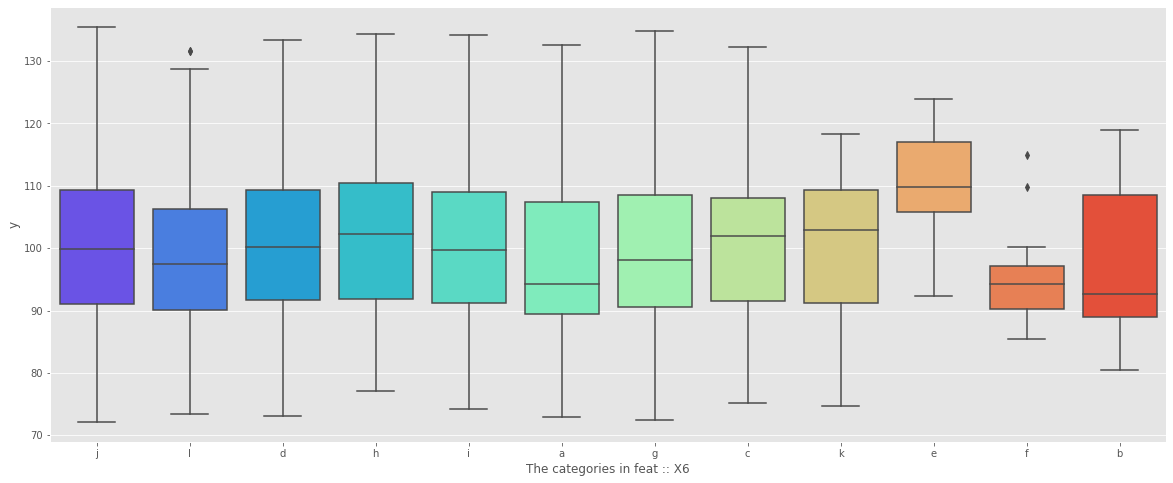

In [36]:
var_name = 'X6'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[6])

In [37]:
print("The total number of categories in X6 ::",len(train_df['X6'].unique()))

The total number of categories in X6 :: 12


### Observation for X6

This plot is y vs categories in X6 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 12 categories in X6 as mentioned in the above cells. The outlier's in this plot can be ignored as there so few and not of high magnitude. And few outliers with decent magnitude should be there in dataset to make the model robust.

### Plot of X8 vs y

Text(0.5, 0, 'The categories in feat :: X8')

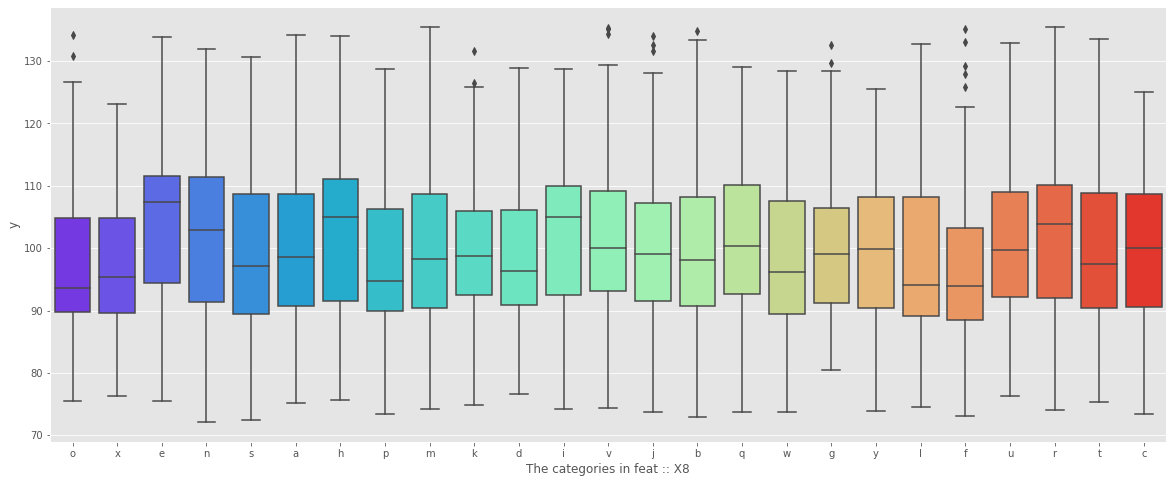

In [38]:
var_name = 'X8'
plt.figure(figsize=(20,8))
sns.boxplot(x= var_name , y='y', data=train_df, palette='rainbow')
plt.xlabel('The categories in feat :: '+ feat[7])

In [39]:
print("The total number of categories in X8 ::",len(train_df['X8'].unique()))

The total number of categories in X8 :: 25


### Observation for X8

This plot is y vs categories in X8 feature. The x value represent's catgeories from X1 and the y value shows the boxplot for corresponding y value points.

There are total 12 categories in X8 as mentioned in the above cells. The outlier's in this plot can be ignored as there so few and not of high magnitude. And few outliers with decent magnitude should be there in dataset to make the model robust.

### Mutlicolinearity Analysis

In [40]:
## https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # initialise vif Dataframe
    vif = pd.DataFrame()
    # create columns "variables" and add all column in dataframe. 
    vif["variables"] = X.columns
    # Calculate VIF for each variable keeping all other variable as independent variables
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # return vif dictionary
    return(vif)

In [41]:
### removing categorical features/non-numeric features

X = train_df.drop(['ID','y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','X11', 'X93', 'X107', 'X233', 'X235',\
                   'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],axis=1)


### passing X to cal_vif function 

vif = calc_vif(X)

In [42]:
## print vif
vif

,variables,VIF
0,X10,inf
1,X12,inf
2,X13,inf
3,X14,inf
4,X15,inf
...,...,...
351,X380,inf
352,X382,inf
353,X383,1.171675
354,X384,1.782908


The variables columns contains numerical features and VIF columns contais Variable Inflation factor of the respective variable.

In [43]:
## disaply vif column to get the gist of the values 

vif['VIF'].values

array([         inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,   4.00512957,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,   1.23442661,          inf,
                inf,          inf,   1.08744606,  20.51535751,
                inf,  37.65379761,   2.40782408,   4.00061557,
                inf, 301.50549258,   3.44664086,   2.70069249,
                inf,          inf,          inf,   2.73838662,
         2.18491675,  14.52373312,          inf,          inf,
                inf,          inf,          inf,          inf,
         2.62968557,   9.00479423,          inf,          inf,
         3.59474991,   4.28654152,   3.83528568,          inf,
         1.34793194,          inf,   4.35300995,       

### Observation

1. We have removed categorical/Non-numerical feature, ID and y(target variable) to calculate the VIF.


2. It takes only numerical variable as input.


3. The greater the value of VIF greater is the multicollinearity of that variable w.r.t other independent variable.


4. From above values we can say that there are so many vairable's which has multicollinearity.


5. VIF starts at 1 and has no upper limit.


6. VIF = 1, no correlation between the independent variable and the other variables.


7. VIF becomes infinfity when R2_score becomes 1, that means high correlation or association.


8. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.


9. This usually won't affect the model performance but reduces the model interpreatbility.


### Encoding Categorical Variables feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

### Description of below class


    Here we have designed a class with base class as LabelEncoder from scikitlearn, and is such that, if any new category is encountered in test data then, for those newly encountered category in unseen data we replace that value with the category having maximum number of occurance from train data from that particular feature. This can be called as mode value imputation.
    
    As beacause there are many feature which has only few or sometimes only one value of that particular category which may come in train or in test data at the time of split, so to deal with such type of categories in a feature this type of solution is applied

In [105]:
data = X_train.head(1)

In [43]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it mode of classes,
        Mode of a value in class will be added in fit and transform will take care of new item.
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        
        
        self.label_encoder = self.label_encoder.fit(list(data_list) ) #+ ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to mode class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        mode = stats.mode(new_data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = [mode.mode[0] if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [44]:
def encode_categorical(train_df, test_df, return_encoder_object=False):
    """
    Input :: 
    
    train_df :: train dataframe containing ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] features. 
    
    test_df :: test dataframe containing ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] features. 
    
    return_encoder_object :: default value = False, if True returns fitted encoder dictionary with key as feature 
    
    value as encoder object.
    
    Encode the categorical features ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] and returns the dictionary 
    
    with key as feature and value as encoded value's of train and test dataframe.

    """
    ### list of categorical feat that needs to be transformed
    feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
    ### initilalise dict to store the object of labelEncoderExt for a particuler feat 
    enc_obj_dict = dict()
    ### to store transfrom train data
    train_enc_feat = pd.DataFrame()
    ### to store transformed test data
    test_enc_feat = pd.DataFrame()

    ## iterate for all the categorical feat 
    for ele in feat:
        ### creat object
        enc_obj = LabelEncoderExt()
        ## fit the object to the train data
        enc_obj.fit(train_df[ele])
        
        enc_obj_dict[ele] = enc_obj
        ## transform the train data
        train_enc_feat[ele] = enc_obj.transform(train_df[ele].values)
        ## transform the test data
        test_enc_feat[ele] = enc_obj.transform(test_df[ele].values)
     
    
    if return_encoder_object:
        return train_enc_feat, test_enc_feat, enc_obj_dict
    else:
        return train_enc_feat, test_enc_feat

### Encoding Train and Test DataFrame

In [45]:
'''
Encoding 8 categorical features using encode_categorical function which takes train, test dataframe and 

a boolean argument which when is True returns the fitted encoder dictionary.

The function returns train, test encoded dataframe and fitted encoder dictionary with key as feature and value 

as fitted encoder object.


'''

train_enc_feat, test_enc_feat, enc_obj_dict = encode_categorical(train_df, test_df, return_encoder_object=True)

In [93]:
enc_cat_obj = 'Fitted_Object/enc_obj_dict.sav'
pickle.dump(enc_obj_dict, open(enc_cat_obj, 'wb'))

In [46]:
enc_obj_dict.keys()

dict_keys(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])

In [47]:
zero_value_feat = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

In [48]:
### create a copy of original data 
"""
Concatination of encoded feature train and train_df 

Similarly, concatinating encoded feature test and test_df


"""
new_train_df = pd.concat([train_enc_feat,train_df.reset_index().drop(['index'],\
                         axis=1).drop(feat + zero_value_feat ,axis=1)],axis=1)
new_test_df = pd.concat([test_enc_feat,test_df.reset_index().drop(['index'],\
                         axis=1).drop(feat + zero_value_feat ,axis=1)],axis=1)

new_train_df.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,16,0,3,24,9,14,0,130.81,...,0,0,1,0,0,0,0,0,0,0
1,32,21,18,4,3,28,11,14,6,88.53,...,1,0,0,0,0,0,0,0,0,0
2,20,24,33,2,3,27,9,23,7,76.26,...,0,0,0,0,0,0,1,0,0,0
3,20,21,33,5,3,27,11,4,9,80.62,...,0,0,0,0,0,0,0,0,0,0
4,20,23,33,5,3,12,3,13,13,78.02,...,0,0,0,0,0,0,0,0,0,0


In [49]:
new_test_df.head(5)

,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,20,23,33,5,3,25,0,22,1,0,...,0,0,0,1,0,0,0,0,0,0
1,40,3,6,0,3,25,6,24,2,0,...,0,0,1,0,0,0,0,0,0,0
2,20,23,15,5,3,25,9,9,3,0,...,0,0,0,1,0,0,0,0,0,0
3,20,13,33,5,3,25,11,13,4,0,...,0,0,0,1,0,0,0,0,0,0
4,43,20,15,2,3,28,8,12,5,0,...,1,0,0,0,0,0,0,0,0,0


### Train Test Split with 80 :: 20 Ratio

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_train_df.drop(['ID','y'], axis = 1),\
                                                    new_train_df.y, test_size= 0.8 , random_state=42) 

In [109]:
print('The number of Datapoints in train X and Y :: ',X_train.shape[0])
print('The number of Datapoints in test X and Y :: ', X_test.shape[0])
print('The number of features in Train and Test set are :: ',X_train.shape[1])

The number of Datapoints in train X and Y ::  831
The number of Datapoints in test X and Y ::  3328
The number of features in Train and Test set are ::  364


### Find no. of components of decomposition to preserve maximum variance and low noise level.

I have referred this paper https://arxiv.org/pdf/1305.5870.pdf to calculate the optimal value of no of components to decompose X_train. Below are the steps i have followed to calculate the same.

1. Calculate beta :: aspect ratio of X_train.
2. Calculate the omega which is correction factor for rectangular shaped input matrix.
3. Calculate threshold tau = oemga * medain(singular values)
4. The singular value above this value are with minimum noise and maximum information.

In [110]:
from sklearn.utils.extmath import randomized_svd

from IPython.display import Image

import math

### Singular value decompositon of X_train into U (left singular) S(singular values)
### and V (right singular values)
U ,S , V = randomized_svd(X_train.values,364)

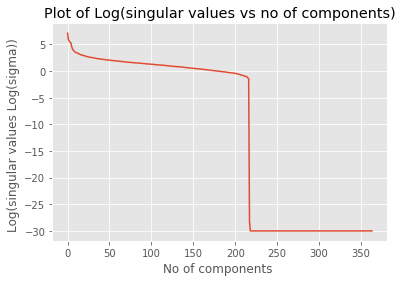

In [111]:
plt.plot(np.log(S))
plt.title("Plot of Log(singular values vs no of components)")
plt.ylabel("Log(singular values Log(sigma)) ")
plt.xlabel("No of components ")
plt.show()

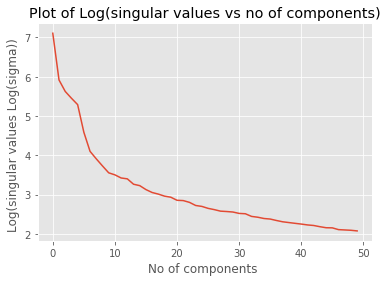

In [112]:
plt.plot(np.log(S[0:50]))
plt.title("Plot of Log(singular values vs no of components)")
plt.ylabel("Log(singular values Log(sigma)) ")
plt.xlabel("No of components ")
plt.show()

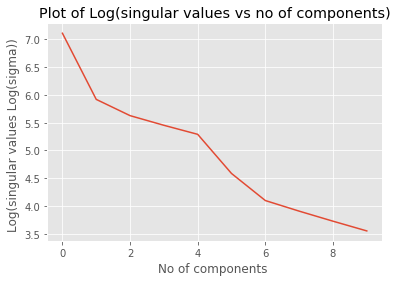

In [113]:
plt.plot(np.log(S[0:10]))
plt.title("Plot of Log(singular values vs no of components)")
plt.ylabel("Log(singular values Log(sigma)) ")
plt.xlabel("No of components ")
plt.show()

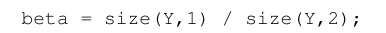

In [114]:
Image(filename = "img/beta_formula.png" ,width = 600 , height = 800 )

In [115]:
### calculate beta (aspect ratio of input matrix )
beta = X_train.shape[0]/X_train.shape[1]
beta

2.282967032967033

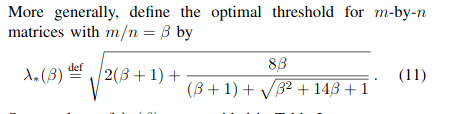

In [116]:
Image(filename = "img/formula_omega.png" ,width = 600 , height = 800 )

In [117]:
### calculate omega 
omega = math.pow(( 2*(beta+1) +  ( ( 8 * beta )/ (beta + 1 + math.pow(beta**2 + 14 *beta + 1 ,.5)) ) ) ,.5) 

omega

2.914835945520384

In [118]:
Image(filename = "img/tau_formula.png" ,width = 600 , height = 800 )

In [119]:
### calculate any threshold tau = omega * median ( Diag(X_train ))
tau = omega * np.median(S)
tau

2.769935104071162

In [120]:
### Take all the singular values which are greater than threshold from the presort S array 
Singular_value = S[S>tau]

Singular_value

array([1221.66391496,  371.91332485,  277.72443456,  233.48479947,
        198.44994206,   98.16844503,   60.34150456,   49.88060412,
         41.63358548,   34.94891434,   33.17925416,   30.64821812,
         29.97270756,   26.13697996,   25.21388427,   22.79619029,
         21.16404747,   20.31648723,   19.28599052,   18.7794344 ,
         17.36279686,   17.23378213,   16.47364545,   15.21242989,
         14.85793654,   14.13796933,   13.69186444,   13.17012801,
         13.04115944,   12.87730753,   12.42974506,   12.32628713,
         11.517456  ,   11.28056496,   10.92045342,   10.77056373,
         10.38399119,   10.04605531,    9.84889894,    9.65654535,
          9.47568136,    9.27148498,    9.14102932,    8.8632901 ,
          8.63212737,    8.60643905,    8.22627325,    8.15825528,
          8.09039389,    7.96039613,    7.77479109,    7.71502123,
          7.54229781,    7.47479148,    7.27757027,    7.16852854,
          7.07169419,    6.92173353,    6.80390301,    6.67627

In [121]:
print("Any components between this is number are feasible to choose \n\n" , np.nonzero(S > tau) )

Any components between this is number are feasible to choose 

 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119]),)


### Creating and Adding decomposed feature

In [122]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## Get all those features which contains 0 and 1 as unique value

column = unikValue_feat['[0, 1]']

def add_decompose_feat(X_train, X_test,no_of_comp):
    """
    
    Add decompose feat to training data and testing data given X_train, X_test,
    
    no_of component, feat_list that is to be decomposed
    
    """

    trunc_SVD = TruncatedSVD(n_components=no_of_comp,random_state=42)

    trunc_SVD_train = trunc_SVD.fit_transform(X_train[column])

    trunc_SVD_test = trunc_SVD.transform(X_test[column])

    PCA_obj = PCA(n_components=no_of_comp,random_state=42)

    PCA_train = PCA_obj.fit_transform(X_train[column])

    PCA_test = PCA_obj.transform(X_test[column])
    
    decom_feat_train = pd.DataFrame()
    
    decom_feat_test = pd.DataFrame()


    for i in range(1, no_of_comp + 1):
        
        decom_feat_train['tsvd_' + str(i)] = trunc_SVD_train[:, i - 1]
        decom_feat_test['tsvd_' + str(i)] = trunc_SVD_test[:, i - 1]
        decom_feat_train['pca_' + str(i)] = PCA_train[:, i - 1]
        decom_feat_test['pca_' + str(i)] = PCA_test[:, i - 1]
        
        
    return decom_feat_train, decom_feat_test, trunc_SVD, PCA_obj

In [123]:
def select_n_comp(X_train,Y_train,n_comp):
    """
    Imput X_train, Y_train, list of n_comp
    
    Decomposition of X_train features to n_comp dimension using 
    
    Will return the list of R2_score per component
    
    """
    R2_score = []

    for no_of_comp in n_comp:

        new_train,new_test,_,_ = add_decompose_feat(X_train,X_test,no_of_comp)
        ## Taking decend depth of tree and create object
        DT =  DecisionTreeRegressor(max_depth= 3,random_state=42 )
        ## Fit the Decision Tree to the Data
        DT.fit(pd.concat([X_train.reset_index().drop(['index'],axis=1), new_train ], axis = 1) , Y_train)
        ## Predict of test data
        Y_pred = DT.predict(pd.concat([X_test.reset_index().drop(['index'],axis=1), new_test], axis= 1 ))
        ## calculate R2_score
        R2 = r2_score(Y_test, Y_pred)
        ## add it in the list
        R2_score.append(R2)
        
    return R2_score


comp = [2, 3 ,5, 7, 9, 11, 12, 13, 15,17, 20]

R2_score = select_n_comp(X_train,Y_train,comp)

Text(0.5, 1.0, 'The Number of Component vs R2_score')

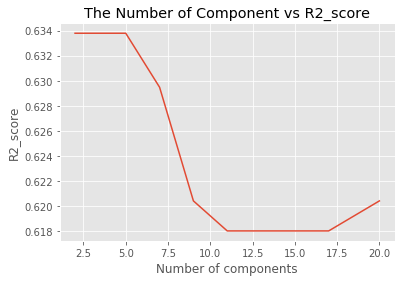

In [124]:
plt.plot(comp, R2_score)
plt.xlabel('Number of components')
plt.ylabel('R2_score')
plt.title("The Number of Component vs R2_score")

### Observation

    Above is the plot of comp to decompose v/s R2_score, from above plot it is clear that n = 5 will be the optimum choice of the component's to decompose the numerical features.
    
    We have arbitarily taken the decent depth of tree, which is 5 here.



## Observation and Conclusion




1. The Dataset contains anonymous features where we don't know what the actual feature/columns represents in real world. Hence, the problem we are dealing with becomes totally and ML problem where domain knowledge is of no use.


2. The problem belongs to regression type of setting where one has to minimize the means square error or maximise the R2_score(Coefficient of Determination).


3. We have to predict y which is time of total process a car takes, so we are dealing with a continous random variable.


4. In EDA we came to know there are 8 categorical variables, target variable(y) as continous random variable and rest are interger(dataype) variables.


5. The integer variable contains two distinct values 0's and 1's, some of the integer variables/features have only zero's. So, we have discarded such variables which contains zero's as only there unique value, as such types of varible's does not add any value to the model.


6. From univariate analysis of target variable (y) we have removed points which has y value greater that 136. 


7. In integer variable anaylsis of the share of '0' value, that is, percentage of '0' value and found that most of the variables contains '0' value greater that 90 %  we tells that imabalance of categories.


8. In analysis of the 8 categorical variable, where some varibles contains many category and some of them contains very few can be seen by plotting distribution of the y value for those categories. 


9. In multicollinearity analysis VIF is calculated for all the variables and it appears that there is high level of multicollinearity present in between independent variables, which will lead to low/incorrect interpretability but this won't affect the Goodness of fit as well the performance of model those features are kept as it is for now.


10. In featurisation categerical encoding and decomposition of features are two types of featurisation are performed.
    
       a. In categorical encoding the 8 categorical features are assigned to unique number's where we have used scikitlearn LabelEncoder and did slight modification to it, where if any new category is found in any features it is then replace by the mode of that particular feature.
    
       b. In Decomposition featurisation all feature are taken and decomposed into the 'N' numner of component's in such a way that maximum information of original varibles are preserved. The number of component's is integer, to find the best number of component (N) a decent amount depth of DecisionTreeRegressor is trained for the various value's of number and component's and the number of componeny which gives highest R2_score is choosen.

In [125]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
470,43,20,15,6,3,9,6,22,0,0,...,1,0,0,0,0,0,0,0,0,0
3634,35,20,15,2,3,25,7,21,0,0,...,1,0,0,0,0,0,0,0,0,0
1396,45,19,37,5,3,2,11,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3675,40,1,2,2,3,25,3,22,0,0,...,1,0,0,0,0,0,0,0,0,0
1549,43,24,15,2,3,3,0,22,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,44,1,15,6,3,22,6,12,0,0,...,1,0,0,0,0,0,0,0,0,0
466,8,13,15,5,3,9,6,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,44,3,2,0,3,21,3,4,0,0,...,0,0,1,0,0,0,0,0,0,0
3772,43,23,15,2,3,25,3,8,0,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
no_of_comp = 5

new_train,new_test,trunc_SVD, PCA_obj = add_decompose_feat(X_train,X_test,no_of_comp)

In [75]:
import pickle

SVD_Filename = 'Fitted_Object/trunc_SVD.sav'
pickle.dump(trunc_SVD, open(base_filename, 'wb'))


PCA_Filename = 'Fitted_Object/PCA_obj.sav'
pickle.dump(PCA_obj, open(meta_filename, 'wb'))

In [76]:
### create featurised X_train and X_test set by adding decompose feature.

X_train_featurised = pd.concat([X_train.reset_index().drop(['index'],axis=1), new_train ], axis = 1)

X_test_featurised = pd.concat([X_test.reset_index().drop(['index'],axis=1), new_test], axis= 1 )

## Linear Regressor Tuning

In [77]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV


In [90]:
# Create logistic regression
logistic = linear_model.SGDRegressor()

# Create regularization penalty space
penalty = [ 'l1','l2','elasticnet']

scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X_SGD = scaler.fit_transform(X_train_featurised)

# Create regularization hyperparameter space
alpha = np.logspace(0, 4, 10)#[1, 10, 100, 1000, 10000]

# Create hyperparameter options
hyperparameters = dict(alpha = alpha , penalty=penalty)

scorer = make_scorer(r2_score, greater_is_better=True)


# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0 , scoring= scorer)

clf.fit(X_SGD , Y_train) #.astype('int'))

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                      

In [91]:
clf.best_estimator_

SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [92]:
best_model_SGR = clf.best_estimator_

r2_train_LR = r2_score(Y_train ,best_model_SGR.predict(X_SGD) )

r2_test_LR = r2_score(Y_test , best_model_SGR.predict(scaler.transform(X_test_featurised)))

print("The r2_score on train set is  :: ", r2_train_LR)
print("The r2_score on test set is :: ", r2_test_LR)

The r2_score on train set is  ::  0.4605728440787381
The r2_score on test set is ::  0.506369362464423


### Preparing Y_test

In [79]:
enc_test_final_df = pd.DataFrame()

for ele in feat:
    
    enc_test_final_df[ele] = enc_obj_dict[ele].transform(test_df[ele])
    
final_test = pd.concat([enc_test_final_df,test_df.drop(feat+['ID'],axis=1)], axis=1)

final_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,20,23,33,5,3,25,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40,3,6,0,3,25,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,20,23,15,5,3,25,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,20,13,33,5,3,25,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,43,20,15,2,3,28,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,7,9,15,5,3,0,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,40,1,6,3,3,0,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,45,23,15,5,3,0,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8,23,15,0,3,0,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
no_of_comp = 5

new_train,decompose_test,_,_ = add_decompose_feat(X_train,final_test,no_of_comp)

In [82]:
submission_df = pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1)
submission_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,tsvd_1,pca_1,tsvd_2,pca_2,tsvd_3,pca_3,tsvd_4,pca_4,tsvd_5,pca_5
0,20,23,33,5,3,25,0,22,0,0,...,3.903828,-0.397793,-0.653340,0.835483,1.472025,-2.067594,-1.099269,3.637277,-2.364018,-1.021227
1,40,3,6,0,3,25,6,24,0,0,...,5.775383,3.730382,3.813730,1.271216,1.067512,0.479351,0.439712,-0.650491,1.559095,1.446607
2,20,23,15,5,3,25,9,9,0,0,...,4.688485,-1.297481,-1.413914,0.766617,1.028260,-0.422166,0.195717,2.072835,-0.379550,0.436652
3,20,13,33,5,3,25,11,13,0,0,...,4.389518,-0.397618,-0.616948,0.752981,1.355125,-2.050645,-1.161999,3.568926,-2.484304,-1.129616
4,43,20,15,2,3,28,8,12,0,0,...,7.056324,-2.816707,-2.625433,0.573450,0.319297,0.746679,0.478041,-1.552230,1.195442,0.665301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,7,9,15,5,3,0,9,4,0,0,...,6.558071,-2.950157,-2.871078,-0.698285,-0.753760,0.309829,0.149281,-0.006800,-0.314418,-0.241653
4205,40,1,6,3,3,0,9,24,0,0,...,6.457944,2.110877,2.205088,0.612664,0.584301,-0.728101,-0.899842,-0.810670,1.791981,1.788675
4206,45,23,15,5,3,0,3,22,0,0,...,5.910590,-1.437960,-1.458556,-2.700796,-2.706469,0.418380,0.065805,0.422747,-0.537140,-0.294390
4207,8,23,15,0,3,0,2,16,0,0,...,7.102051,-2.207143,-1.996069,1.388434,1.050262,1.338132,1.246006,-0.964448,0.493896,0.110957


In [95]:
Y_pred_SGR = best_model_SGR.predict(scaler.transform(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1)))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_SGR

y_final.to_csv('submission_modelling_1.csv', index= False)

## SupportVectorRegressor Tuning 

In [84]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import make_scorer

In [85]:
# Create logistic regression
svr = SVR()


scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X_svr = scaler.fit_transform(X_train_featurised)

# Create regularization hyperparameter space
C = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create hyperparameter options
hyperparameters =  [{'kernel': ['lnear','rbf','poly'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],\
                                 'C': [1, 10, 100, 1000, 10000]}]
#dict(C = C , kernel =kernel)

scorer = make_scorer(r2_score, greater_is_better=True)

# Create grid search using 5-fold cross validation
clf = GridSearchCV( svr, hyperparameters, cv=5, verbose=0 , scoring= scorer ,n_jobs=-1)

start = time()

clf.fit(X_svr , Y_train)

print("Linear Kernel Normalized Fit Time: {} s".format(time() - start))

Linear Kernel Normalized Fit Time: 100.66155076026917 s


In [86]:
clf.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
best_model_SVR = clf.best_estimator_

r2_train_SVR = r2_score(Y_train ,best_model_SVR.predict(X_svr))

r2_test_SVR = r2_score(Y_test , best_model_SVR.predict(scaler.transform(X_test_featurised)))

print("The r2_score on train set is  :: ", r2_train_SVR)
print("The r2_score on test set is :: ", r2_test_SVR)

The r2_score on train set is  ::  0.6235668186401301
The r2_score on test set is ::  0.6025588952493659


In [83]:
Y_pred_SVR = best_model_SVR.predict(scaler.transform(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1)))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_SVR

y_final.to_csv('submission_modelling_2.csv', index= False)

## DecisonTreeRegressor Tuning

In [88]:
Tree = DecisionTreeRegressor(random_state=42)

### parameter's to tune

max_depth = [3, 4, 5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

### parameter dictionary used to pass
hyperF = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

scorer = make_scorer(r2_score, greater_is_better=True)

### creating object of GridSearchCV 
grid = GridSearchCV(Tree, hyperF, cv = 3, verbose = 1, n_jobs = -1 ,scoring=scorer)


### fit the model
grid.fit(X_train_featurised, Y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 755 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 787 out of 810 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    2.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 8, 15, 25, 30, 50, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 15, 10

In [90]:
best_model_DT = grid.best_estimator_
best_model_DT

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [132]:
base_filename = 'Fitted_Object/best_model_regressor.sav'
pickle.dump(best_model_DT, open(base_filename, 'wb'))

In [89]:


r2_train_DT = r2_score(Y_train ,best_model_DT.predict(X_train_featurised) )

r2_test_DT = r2_score(Y_test , best_model_DT.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_DT)
print("The r2_score on test set is :: ", r2_test_DT)

The r2_score on train set is  ::  0.6252917971612755
The r2_score on test set is ::  0.641127322651597


In [173]:
Y_pred_DT = best_model_DT.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_DT

y_final.to_csv('submission_modelling_3.csv', index= False)

## Tuning RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

### create object of randomforestregressor class
forest = RandomForestRegressor(random_state=42)

### parameter's to tune
n_estimators = [100, 300, 500]
max_depth = [ 3, 4, 5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

### parameter dictionary used to pass
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


### creating object of GridSearchCV 
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)


### fit the model
gridF.fit(X_train_featurised, Y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [104]:
best_model_rf = gridF.best_estimator_

In [100]:
r2_train_RF = r2_score(Y_train ,best_model_rf.predict(X_train_featurised) )

r2_test_RF = r2_score(Y_test , best_model_rf.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_RF)
print("The r2_score on test set is :: ", r2_test_RF)

The r2_score on train set is  ::  0.6260926478439053
The r2_score on test set is ::  0.6458889911998129


In [174]:
Y_pred_rf = best_model_rf.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_rf

y_final.to_csv('submission_modelling_4.csv', index= False)

## XGBRegressor Tuning

In [102]:
import xgboost as xgb

model = xgb.XGBRegressor()

param_dist = {"max_depth": [ 3, 4, 5, 8, 15, 25, 30, 50, 100],
              "min_child_weight" : [ 1, 3, 6],
              "n_estimators": [100, 200 , 300, 500],
              "learning_rate": [0.05, 0.1,0.16]}

grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, verbose=10, n_jobs=-1, scoring='r2')

grid_search.fit(X_train_featurised, Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [103]:
best_model_xgb = grid_search.best_estimator_

r2_train_xgb = r2_score(Y_train ,best_model_xgb.predict(X_train_featurised) )

r2_test_xgb = r2_score(Y_test , best_model_xgb.predict(X_test_featurised))

print("The r2_score on train set is  :: ", r2_train_xgb)
print("The r2_score on test set is :: ", r2_test_xgb)

The r2_score on train set is  ::  0.6907559420438926
The r2_score on test set is ::  0.6306931488876093


In [105]:
Y_pred_xgb = best_model_xgb.predict(pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1))

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_xgb

y_final.to_csv('submission_modelling_5.csv', index= False)

In [3]:
from prettytable import PrettyTable

Table = PrettyTable()

row_names = ['LinearRegressor','SupportVectorRegressor','DecisonTreeRegressor','RandomForest','XGBRegressor']

#Train_score = [r2, 0.79385, 0.6485, 0.6907, 0.67082]

#Test_score = [0.311465, 0.5850, 0.63929 , 0.63069, 0.63721]

Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.46057, 0.6235, 0.62529, 0.62609, 0.69075])

Table.add_column('Test R2score',[0.5063, 0.6025, 0.6411, 0.64588 , 0.63069])

Table.add_column('Public_Score',[0.41819, 0.50429, 0.54614, 0.54267, 0.52427])

Table.add_column('Private_Score',[0.40810, 0.48849, 0.54024, 0.53747, 0.51938])

print(Table)

+------------------------+---------------+--------------+--------------+---------------+
|         Model          | Train R2score | Test R2score | Public_Score | Private_Score |
+------------------------+---------------+--------------+--------------+---------------+
|    LinearRegressor     |    0.46057    |    0.5063    |   0.41819    |     0.4081    |
| SupportVectorRegressor |     0.6235    |    0.6025    |   0.50429    |    0.48849    |
|  DecisonTreeRegressor  |    0.62529    |    0.6411    |   0.54614    |    0.54024    |
|      RandomForest      |    0.62609    |   0.64588    |   0.54267    |    0.53747    |
|      XGBRegressor      |    0.69075    |   0.63069    |   0.52427    |    0.51938    |
+------------------------+---------------+--------------+--------------+---------------+


### Kaggle Submission Scores

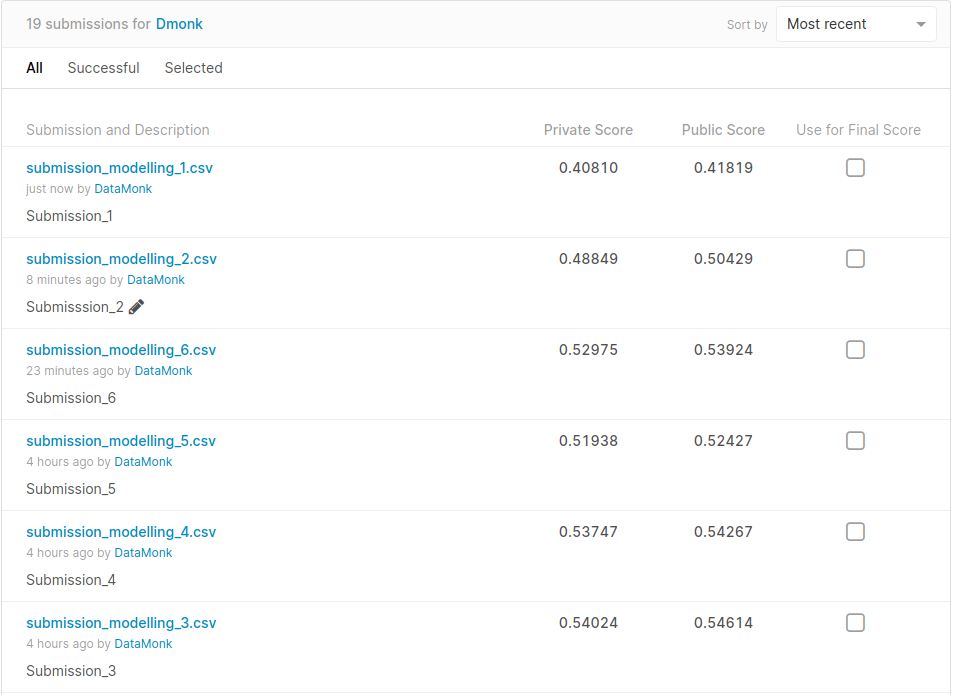

In [133]:
Image(filename = "img/Modelling_1.png" ,width = 1000 , height = 1000 )

In [6]:
print('Average Train score on data in Train.csv data ', np.mean([0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022]))


print('Average Test score on data in Train.csv data ', np.mean([0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721]))


print("Average Public score ", np.mean([0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924]))


print("Average Private score ", np.mean([0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975]))

Average Train score on data in Train.csv data  0.6144033333333333
Average Test score on data in Train.csv data  0.6106133333333333
Average Public score  0.5124666666666666
Average Private score  0.5039049999999999


# Observation and Conclusion

1. The average train and test score are 0.6144 and 0.6106 from all the models we have tried.
2. The average Public and Private obtained from Kaggle Platform after the respective file submission's are 0.5124 and 0.5039.
3. The best performance is achieved by Simple Decision Tree Model which is 0.54614 and 0.54024 public and private score.
4. Hence, in this frist approach decision tree outperformed all the other model's, there could be several reasons for that.


## Custom Implementation

In [74]:
### Divide data into 50 : 50 into D1 and D2

D1_X ,D2_X, D1_Y, D2_Y = train_test_split(X_train_featurised, Y_train, test_size = 0.5, random_state = 42)

In [113]:
import random

def train_model(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params,base_model,meta_clf):
    '''
    Takes that data as input which is split in D1 and D2 
    
    D1 is than again sampled with replacement to create small samples to train equal amount of base model
    
    (num_of_samples).
    
    D2 is use to predict and create new sample for metaclassifier with Y_actual in D2 as true label
    
    return base_model_dic and metaclassifier
    
    
    '''

    param_choose = 100

    sample_dic = {}

    model_dic = {}

    predict_data = pd.DataFrame()
    ## iterate for num_of_samples 
    for i in range(num_of_samples):
        clf=0
        ### Array of Index to sample the data 
        row_index =  np.array(random.sample(range(0,415),param_choose)).reshape(-1,1)
        ## sample data points from D1
        x_sample = D1_X.values[row_index,].reshape(param_choose,374)
        ## corresponding sampled labels
        y_sample = D1_Y.values[row_index,]
        ## store data of row index and col index of each sample
        sample_dic["sample"+str(i+1)] = row_index ## dictionary of samples
        ## create object as classifier
        clf = base_model() ##DecisionTreeRegressor(max_depth=3, random_state=42)
        ## fit regressor on sampled data 
        
        ### Saving model of every sampled set 
        model_dic["Model"+str(i+1)] = clf.fit(x_sample,y_sample)
        #GridSearchCV(Ridge(),param_grid= params, scoring='r2').fit(x_sample,\
                                                                # y_sample).best_estimator_ 
        ## predict using D2 data
        predict_data['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(D2_X.values)

    ## create 
    predict_data['Y_actual'] = D2_Y.values
    

    meta_clf = GridSearchCV(meta_clf,param_grid= params, scoring='r2').fit(predict_data.drop(['Y_actual'],axis=1),\
                                                                 predict_data.Y_actual).best_estimator_ 

    return model_dic, meta_clf, predict_data

In [167]:
def evaluate(model_dic,meta_clf,data_predict, num_of_samples):
    """
    function to evaluate train model
    
    base model : model_dic
    
    meta classifier : meta_clf
    
    num_of_samples
    
    """

    evalue_df = pd.DataFrame()

    for i in range(num_of_samples):

        evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(data_predict)

    return meta_clf.predict(evalue_df)

###  Base Model : Decision Tree ; Meta Classifier : Lasso

In [152]:
import random
from sklearn.linear_model import Ridge,Lasso

In [89]:
### no of estimators to create

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

base_model = DecisionTreeRegressor(max_depth=3, random_state=42)

r2_score_lst = []

for i in [30, 50, 80, 100, 200, 300, 500]:

    ### train the model 
    model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,i,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Lasso())

    ### r2_score 
    r2_score_lst.append(r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,i)))

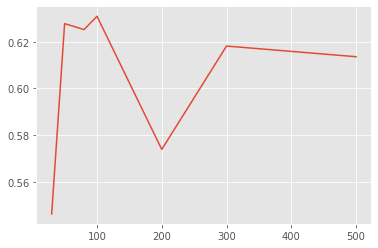

In [90]:
plt.plot([30, 50, 80, 100, 200, 300, 500],r2_score_lst)
plt.show()


In [144]:
num_of_samples = 100

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}


model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y, num_of_samples,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Lasso())

print('Train r2_score :: ',r2_score(Y_train,evaluate(model_dic,meta_clf,X_train_featurised,num_of_samples)))
print('Test r2_score :: ',r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,num_of_samples)))

Train r2_score ::  0.5976221563971347
Test r2_score ::  0.6272951317014197


In [145]:
import pickle

base_filename = 'Base Model : Decision Tree ; Meta Classifier : Lasso/base_model.sav'
pickle.dump(model_dic, open(base_filename, 'wb'))


meta_filename = 'Base Model : Decision Tree ; Meta Classifier : Lasso/meta_model.sav'
pickle.dump(meta_clf, open(meta_filename, 'wb'))
 
# some time later...
 
# load the model from disk
base_model = pickle.load(open(base_filename, 'rb'))

meta_model = pickle.load(open(meta_filename, 'rb'))

In [146]:
Y_pred_Custom_1 = evaluate(model_dic,meta_clf,pd.concat([final_test,decompose_test], axis=1).drop(zero_value_feat,axis=1),num_of_samples)

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_Custom_1

y_final.to_csv('submission_modelling_7.csv', index= False)

In [92]:
meta_clf

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

###  Base Model : Lasso  ; Meta Classifier : Decision Tree

In [102]:
#params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
 #            "fit_intercept": [True, False]}

#base_model = DecisionTreeRegressor(max_depth=3, random_state=42)

### parameter's to tune

max_depth = [3, 4, 5, 8, 15, 25, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

### parameter dictionary used to pass
params = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

params = {}

r2_score_lst = []

for i in [30, 50, 80, 100, 200, 300, 500]:

    ### train the model 
    model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,i,params,\
                        Lasso(), DecisionTreeRegressor( max_depth=3,random_state=42))

    ### r2_score 
    r2_score_lst.append(r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,i)))

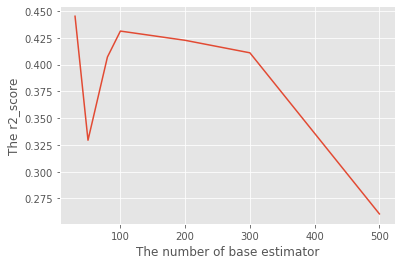

In [103]:
plt.plot([30, 50, 80, 100, 200, 300, 500],r2_score_lst)
plt.xlabel('The number of base estimator')
plt.ylabel('The r2_score')
plt.show()

In [133]:
num_of_samples = 100

params = dict( max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y, num_of_samples,params,\
                        Lasso(), DecisionTreeRegressor(max_depth=3, random_state=42))

print('Train r2_score :: ',r2_score(Y_train,evaluate(model_dic,meta_clf,X_train_featurised,num_of_samples)))
print('Test r2_score :: ',r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,num_of_samples)))

Train r2_score ::  0.337373762562197
Test r2_score ::  0.41799086395088003


In [136]:
base_filename = 'Base Model : Lasso ; Meta Classifier : Decision Tree/base_model.sav'
pickle.dump(model_dic, open(base_filename, 'wb'))


meta_filename = 'Base Model : Lasso ; Meta Classifier : Decision Tree/meta_model.sav'
pickle.dump(meta_clf, open(meta_filename, 'wb'))
 
# some time later...
 
# load the model from disk
base_model = pickle.load(open(base_filename, 'rb'))

meta_model = pickle.load(open(meta_filename, 'rb'))

In [137]:
Y_pred_Custom_2 = evaluate(model_dic,meta_clf,pd.concat([final_test,decompose_test],\
                                                        axis=1).drop(zero_value_feat,axis=1),num_of_samples)

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_Custom_2

y_final.to_csv('submission_modelling_8.csv', index= False)

###  Base Model : Decision Tree ; Meta Classifier : Ridge Regressor

In [111]:
params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

r2_score_lst = []

for i in [30, 50, 80, 100, 200, 300, 500]:

    ### train the model 
    model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,i,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Ridge())

    ### r2_score 
    r2_score_lst.append(r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,i)))

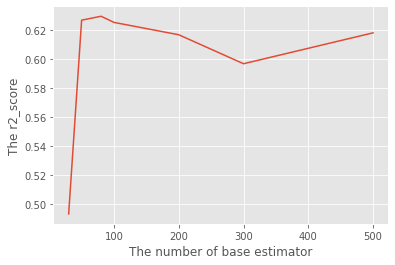

In [110]:
plt.plot([30, 50, 80, 100, 200, 300, 500],r2_score_lst)
plt.xlabel('The number of base estimator')
plt.ylabel('The r2_score')
plt.show()

In [148]:
num_of_samples = 100

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

model_dic, meta_clf = train_model(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params,\
                        DecisionTreeRegressor(max_depth=3, random_state=42),Ridge())

print('Train r2_score :: ',r2_score(Y_train,evaluate(model_dic,meta_clf,X_train_featurised,num_of_samples)))
print('Test r2_score :: ',r2_score(Y_test,evaluate(model_dic,meta_clf,X_test_featurised,num_of_samples)))

Train r2_score ::  0.614931845895948
Test r2_score ::  0.6333276698392729


In [149]:
base_filename = 'Base Model : Decision Tree ; Meta Classifier : Ridge Regressor/base_model.sav'
pickle.dump(model_dic, open(base_filename, 'wb'))


meta_filename = 'Base Model : Decision Tree ; Meta Classifier : Ridge Regressor/meta_model.sav'
pickle.dump(meta_clf, open(meta_filename, 'wb'))
 
# some time later...
 
# load the model from disk
base_model = pickle.load(open(base_filename, 'rb'))

meta_model = pickle.load(open(meta_filename, 'rb'))

In [150]:
Y_pred_Custom_2 = evaluate(model_dic,meta_clf,pd.concat([final_test,decompose_test],\
                                                        axis=1).drop(zero_value_feat,axis=1),num_of_samples)

y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_Custom_2

y_final.to_csv('submission_modelling_9.csv', index= False)

### Kaggle Submissions Scores 

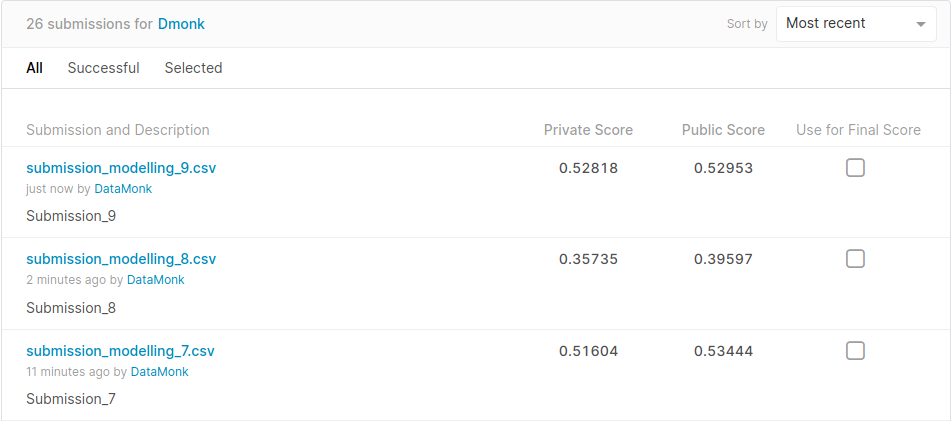

In [152]:
from IPython.display import Image

Image(filename = "img/Modelling_2.png" ,width = 1000 , height = 800 )

In [156]:
Table = PrettyTable()

row_names = ['LinearRegressor','SupportVectorRegressor','DecisonTreeRegressor','RandomForest',\
             'XGBRegressor','CatBoostRegressor','Base:DecisionTree; MetaClf: Lasso', \
             'Base:Lasso ; MetaClf: DecisionTree',\
             'Base:DecisionTree ; MetaCLf:Ridge Regressor']

#Train_score = [r2, 0.79385, 0.6485, 0.6907, 0.67082]

#Test_score = [0.311465, 0.5850, 0.63929 , 0.63069, 0.63721]

Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022, 0.59762, 0.33737, 0.61493])

Table.add_column('Test R2score',[0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721, 0.62729, 0.41799, 0.63332])

Table.add_column('Public_Score',[0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924, 0.53444, 0.39597, 0.52953])

Table.add_column('Private_Score',[0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975, 0.51604, 0.35735, 0.52818])

print(Table)

+---------------------------------------------+---------------+--------------+--------------+---------------+
|                    Model                    | Train R2score | Test R2score | Public_Score | Private_Score |
+---------------------------------------------+---------------+--------------+--------------+---------------+
|               LinearRegressor               |    0.46057    |    0.5063    |   0.41819    |     0.4081    |
|            SupportVectorRegressor           |     0.6235    |    0.6025    |   0.50429    |    0.48849    |
|             DecisonTreeRegressor            |    0.62529    |    0.6411    |   0.54614    |    0.54024    |
|                 RandomForest                |    0.62609    |   0.64588    |   0.54267    |    0.53747    |
|                 XGBRegressor                |    0.69075    |   0.63069    |   0.52427    |    0.51938    |
|              CatBoostRegressor              |    0.66022    |   0.63721    |   0.53924    |    0.52975    |
|      Bas

## Observation and Conclusion

1. The kaggle score from custom implementation are obtained and from those model's Base: Decision Tree and MetaCLf: Ridge Regressor gives the best score amongst the custom implementation.
2. But still simple Deceision Tree is by far the best model with 0.54614 as public and 0.54024 as private score.

## Neural Network Implementaton


### Base Model: Ridge Regression and MetaClassifier: Neural Network

In [303]:
import random

def train_model_nn(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params,base_model):
    '''
    Takes that data as input which is split in D1 and D2 
    
    D1 is than again sampled with replacement to create small samples to train equal amount of base model
    
    (num_of_samples).
    
    We are not training here metaclassfier
    
    '''

    param_choose = 100

    sample_dic = {}

    model_dic = {}

    predict_data = pd.DataFrame()
    ## iterate for num_of_samples 
    for i in range(num_of_samples):
        clf=0
        ### Array of Index to sample the data 
        row_index =  np.array(random.sample(range(0,415),param_choose))
        ## sample data points from D1
        x_sample = D1_X.values[row_index,].reshape(param_choose,374)
        ## corresponding sampled labels
        y_sample = D1_Y.values[row_index,]
        ## store data of row index and col index of each sample
        sample_dic["sample"+str(i+1)] = row_index ## dictionary of samples
        ## create object as classifier
       ##DecisionTreeRegressor(max_depth=3, random_state=42)
        ## fit regressor on sampled data 
        
        best_model = GridSearchCV(base_model(),param_grid= params, scoring='r2').fit(x_sample,y_sample).best_estimator_
        
        #best_model = Ridge(alpha=param['alpha'] ,fit_intercept=param['fit_intercept'])

        #best_model.fit(x_sample,y_sample)
        model_dic["Model"+str(i+1)] = best_model.fit(x_sample, y_sample)
        #
        ## predict using D2 data
        predict_data['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(D2_X.values)

    ## create 
    predict_data['Y_actual'] = D2_Y.values
    

    return model_dic, meta_clf, predict_data

### Training the Base Learners: Ridge Regressor

In [250]:
num_of_samples = 300

params = {'alpha':[.00001, .0001, .001, .01, 0, 1, 10,100, 1000, 10000, 100000, 500000 ],\
             "fit_intercept": [True, False]}

model_dic, meta_clf, predict_data = train_model_nn(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params, Ridge)

In [251]:
predict_data

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300,Y_actual
0,94.822256,91.446405,93.780257,97.814513,100.691704,92.825219,96.485451,94.776254,90.610817,93.508165,...,91.747572,92.464062,95.099200,94.544402,95.908547,90.521909,95.820181,90.722272,92.550694,89.34
1,91.817653,99.299759,93.718048,91.661492,98.627034,91.112454,100.008002,88.349274,106.623987,96.588234,...,97.313435,98.440166,94.544040,95.179615,96.287412,94.307252,97.681857,96.540359,97.488298,88.69
2,107.859374,111.229419,103.504837,104.823459,103.538389,104.281176,106.295098,107.413071,105.563492,101.251151,...,108.696118,106.874576,113.471123,102.047361,105.468697,104.384857,110.453047,102.427363,109.084599,105.15
3,105.041850,106.488526,104.671893,112.220587,105.014703,103.028127,101.812932,109.415891,93.977892,105.289683,...,101.409348,109.234172,99.008336,109.620894,109.794750,109.732989,111.189349,105.717927,100.797229,114.07
4,93.305327,94.746271,93.525683,92.062739,102.567412,94.157254,90.523023,93.975672,90.242718,88.428504,...,90.418574,89.109387,87.328551,87.109258,93.659893,86.192512,97.000112,89.101461,92.716946,92.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,92.056092,95.143066,99.189662,96.673612,93.944395,92.446865,96.731635,90.392076,98.460768,95.974507,...,92.905567,93.682476,90.295522,93.982006,96.753098,99.941037,98.223958,95.111865,92.755807,110.07
412,78.338607,78.770769,75.453119,78.376906,79.900574,79.796260,78.218537,81.791604,98.823409,77.365334,...,81.958813,79.590115,77.608083,86.488443,75.633862,79.590803,79.264018,80.173211,85.793823,76.10
413,88.343020,89.112517,89.967631,92.204465,92.643630,92.398594,89.691788,92.158011,88.743354,85.942143,...,85.866561,89.463901,89.168832,90.097297,94.643135,90.167394,90.356486,87.378146,88.108078,89.58
414,107.604233,114.235105,110.270457,109.839561,115.254022,103.509491,108.995476,110.396933,110.521551,110.581259,...,110.995507,112.191109,113.129297,113.120608,109.148948,112.414297,118.070597,107.670096,109.448660,105.61


In [252]:
X = predict_data.drop(['Y_actual'],axis=1)

Y = predict_data.Y_actual

X.shape, Y.shape

((416, 300), (416,))

### Training Metaclassifier: Neural Network

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow

In [294]:
clear_session()

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(400, kernel_initializer='normal',input_dim = num_of_samples, activation='relu'))
# The Hidden Layers :
#NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=5),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='weights/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tensorflow.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer= tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001,\
    rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop"), metrics=['mean_absolute_error'])

NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               120400    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 160,601
Trainable params: 160,601
Non-trainable params: 0
_________________________________________________________________


In [295]:
NN_model.fit(X, Y, epochs= 100, batch_size= 100 , validation_split = 0.3, callbacks= my_callbacks)

Train on 291 samples, validate on 125 samples
Epoch 1/100
291/291 [==============================] - 0s 896us/sample - loss: 106.7505 - mean_absolute_error: 106.7505 - val_loss: 100.3734 - val_mean_absolute_error: 100.3734
Epoch 2/100
291/291 [==============================] - 0s 68us/sample - loss: 99.9155 - mean_absolute_error: 99.9155 - val_loss: 95.1918 - val_mean_absolute_error: 95.1918
Epoch 3/100
291/291 [==============================] - 0s 66us/sample - loss: 94.9965 - mean_absolute_error: 94.9965 - val_loss: 90.8029 - val_mean_absolute_error: 90.8029
Epoch 4/100
291/291 [==============================] - 0s 72us/sample - loss: 90.7163 - mean_absolute_error: 90.7163 - val_loss: 86.8045 - val_mean_absolute_error: 86.8045
Epoch 5/100
291/291 [==============================] - 0s 68us/sample - loss: 86.7633 - mean_absolute_error: 86.7633 - val_loss: 83.0252 - val_mean_absolute_error: 83.0252
Epoch 6/100
291/291 [==============================] - 0s 66us/sample - loss: 83.0059 - m

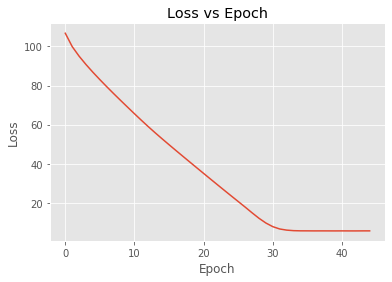

In [339]:
plt.plot(NN_model.history.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [134]:
## NN_model.load_weights('weights/model.16-4.88.h5')

In [296]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(X_test_featurised)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,112.299827,108.190612,113.025784,116.183200,107.311291,108.084246,108.102558,110.602944,94.621478,105.952553,...,102.923360,106.414616,105.834094,106.931827,110.550656,110.305243,108.585417,109.226119,108.120081,106.457191
1,99.838194,90.259151,99.124911,100.532369,87.559900,97.489870,99.286601,96.538013,94.297676,91.623701,...,95.700636,92.661321,94.490087,94.976980,97.839597,98.074871,98.736958,98.475016,98.167521,97.967128
2,113.565514,117.231379,109.405638,118.640802,115.328386,110.049447,117.042520,115.033284,104.939160,108.844075,...,109.008813,116.553961,117.446956,114.005046,111.121560,117.659595,119.117017,115.416025,118.957826,118.637727
3,100.612666,106.475365,106.000912,107.906255,105.279614,100.718695,101.005288,104.896494,102.882917,108.815175,...,108.934873,101.634818,107.645263,103.118597,98.111330,104.076404,111.528332,105.162073,101.388675,104.202772
4,111.150925,107.717495,114.545697,111.350137,105.024655,108.321950,106.556502,112.234403,97.806523,102.633416,...,108.556205,107.675413,109.214501,107.426018,106.909801,108.296977,108.996929,111.779403,107.381831,105.129641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,110.350178,109.631108,114.733912,108.971838,109.362409,103.375669,107.669276,112.949942,102.932131,109.555915,...,106.410258,104.737719,107.080538,108.254915,112.681133,111.773704,118.155536,111.537582,108.615863,109.751348
3324,102.345044,102.302580,103.679314,103.772185,106.183783,100.674061,108.712976,105.672574,102.745561,99.185382,...,104.095422,103.114664,105.349140,104.512975,100.529494,102.681456,108.904687,101.982889,102.608524,102.921345
3325,82.913333,82.080248,80.455102,77.065280,83.920138,81.802963,75.567885,77.311191,104.558804,87.317571,...,87.032844,82.863492,78.438020,81.705831,84.843693,84.606602,78.446418,83.537107,78.723117,86.957651
3326,100.505291,101.897619,96.018496,97.119321,110.833807,98.608371,103.023557,97.083725,99.899330,98.555750,...,108.006160,104.025656,103.029588,100.868435,98.472519,104.728555,96.749376,99.054955,98.818825,103.671206


In [297]:
r2_score(Y_test,NN_model.predict(evalue_df))

0.5468107163713067

In [281]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(submission_df)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,74.266241,76.362632,74.695315,76.360778,80.722337,77.420930,80.046548,80.847562,94.142377,75.260753,...,69.822817,82.212164,77.106598,74.838010,80.658580,75.811794,79.317234,74.289298,79.025309,80.832930
1,97.762803,95.290347,95.964878,99.786290,94.897347,94.859069,99.528454,94.828283,95.128734,96.777415,...,94.705323,102.592143,100.268389,93.959273,95.343203,97.215422,92.375948,98.982337,95.306781,93.921587
2,82.862586,80.236702,81.557579,84.492800,83.910921,79.208305,84.090218,82.335389,96.614769,80.191659,...,81.153223,89.973012,83.375464,84.412282,82.583369,88.942165,82.578028,82.493801,79.124477,88.617891
3,79.604747,77.153660,78.775845,77.465390,78.599263,80.209614,78.898591,78.766002,97.138894,78.343158,...,82.816742,83.498788,79.706681,77.312091,80.297354,77.508085,80.599949,77.530639,78.143741,84.242138
4,106.332264,105.388031,112.930136,112.631349,106.146005,101.686208,100.526653,105.991715,91.267875,104.716754,...,110.774211,102.612585,110.121111,101.123417,107.648931,109.225342,106.508586,112.362256,104.083731,104.086831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,108.485300,110.377088,102.348240,103.105939,109.831834,103.330442,108.535467,103.786951,111.596330,108.472862,...,107.307996,103.275923,112.761285,108.852094,108.378132,101.276405,104.287209,113.175725,102.994893,107.773200
4205,96.760364,97.365076,93.259459,98.297203,105.672585,93.563810,102.947970,89.908022,102.863190,93.710701,...,98.208431,99.957529,97.886794,99.042044,95.118876,102.381794,90.287748,100.398672,94.003613,96.092587
4206,89.913433,94.413825,87.036632,92.341138,105.412837,95.726592,97.375789,96.465728,96.440240,89.438303,...,91.087536,88.690512,94.554842,90.611570,96.662774,98.500475,87.546836,97.213507,88.903292,88.029871
4207,108.291591,111.165384,111.193978,105.629380,112.090805,99.615022,110.110881,107.557927,108.875165,108.623392,...,106.987959,111.745394,111.159862,111.517862,113.542748,109.927580,108.916618,113.464693,106.474627,112.045609


In [282]:
Y_pred_NN  = NN_model.predict(evalue_df)

In [283]:
y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_NN

y_final.to_csv('submission_modelling_10.csv', index= False)

In [342]:
print('THe Public score {} and Private score {} for NN Regressor as metaclassifier and Ridge Regression and Base Learner '.format(0.45571, 0.47559))

THe Public score 0.45571 and Private score 0.47559 for NN Regressor as metaclassifier and Ridge Regression and Base Learner 


### Base Model: DecisionTree and MetaClassifier: Neural Network

### Traininge the base learners

In [311]:
num_of_samples = 300

min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 20, 30] 

params = dict( min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)


model_dic, meta_clf, predict_data = train_model_nn(D1_X ,D2_X, D1_Y, D2_Y,num_of_samples,params, DecisionTreeRegressor)

In [312]:
predict_data

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300,Y_actual
0,93.812222,89.788182,93.253455,88.491818,89.859167,94.859310,92.328333,89.263333,92.031613,95.257193,...,94.153684,88.227692,88.356667,95.488947,92.991429,87.732857,89.227273,94.536000,93.340000,89.34
1,91.590000,87.246667,93.253455,88.491818,93.361818,94.859310,107.772500,88.428000,95.977097,95.257193,...,94.153684,96.088333,97.365000,95.488947,92.991429,87.732857,94.956923,91.655833,93.340000,88.69
2,99.788571,106.858889,109.650222,108.788649,109.655000,108.469524,118.484000,99.977500,109.158947,109.826047,...,108.572558,100.652222,102.428750,108.849302,103.497857,101.358462,99.260000,109.890000,110.924318,105.15
3,107.181250,107.700000,109.650222,108.788649,110.275000,108.469524,106.982857,119.910000,109.158947,109.826047,...,108.572558,111.528182,112.155556,108.849302,109.045714,107.682308,112.241538,112.383333,110.924318,114.07
4,96.485000,100.430000,93.253455,95.821500,93.022857,94.859310,89.113750,88.894000,92.031613,95.257193,...,94.153684,88.227692,88.356667,95.488947,101.838000,92.718000,89.227273,84.511667,93.340000,92.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,89.223333,87.246667,93.253455,88.491818,93.361818,94.859310,107.772500,88.428000,92.031613,95.257193,...,94.153684,96.088333,97.365000,95.488947,89.893750,90.728462,94.956923,91.655833,93.340000,110.07
412,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000,76.10
413,89.293333,92.520000,93.253455,95.821500,89.859167,94.859310,89.545000,88.894000,92.031613,95.257193,...,94.153684,88.227692,98.860000,95.488947,87.940000,92.718000,89.227273,94.536000,93.340000,89.58
414,116.000000,113.633846,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,108.572558,107.300000,112.155556,108.849302,112.614000,119.035000,122.825000,112.383333,110.924318,105.61


In [313]:
X = predict_data.drop(['Y_actual'],axis=1)

Y = predict_data.Y_actual

X.shape, Y.shape

((416, 300), (416,))

In [323]:
clear_session()

NN_model_2 = Sequential()

# The Input Layer :
NN_model_2.add(Dense(300, kernel_initializer='normal',input_dim = num_of_samples, activation='relu'))
# The Hidden Layers :
#NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_2.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_2.add(Dense(1, kernel_initializer='normal',activation='linear'))


my_callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(patience=5),
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='weights_model_2/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tensorflow.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Compile the network :
NN_model_2.compile(loss='mean_absolute_error', optimizer= tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001,\
    rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop"), metrics=['mean_absolute_error'])

NN_model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               90300     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 120,501
Trainable params: 120,501
Non-trainable params: 0
_________________________________________________________________


In [324]:
NN_model_2.fit(X, Y, epochs= 100, batch_size= 100 , validation_split = 0.2, callbacks= my_callbacks)

Train on 332 samples, validate on 84 samples
Epoch 1/100
332/332 [==============================] - 0s 788us/sample - loss: 120.3749 - mean_absolute_error: 120.3749 - val_loss: 114.6476 - val_mean_absolute_error: 114.6476
Epoch 2/100
332/332 [==============================] - 0s 60us/sample - loss: 113.7114 - mean_absolute_error: 113.7114 - val_loss: 109.6920 - val_mean_absolute_error: 109.6920
Epoch 3/100
332/332 [==============================] - 0s 57us/sample - loss: 109.0341 - mean_absolute_error: 109.0341 - val_loss: 105.5264 - val_mean_absolute_error: 105.5264
Epoch 4/100
332/332 [==============================] - 0s 66us/sample - loss: 105.0112 - mean_absolute_error: 105.0112 - val_loss: 101.8158 - val_mean_absolute_error: 101.8158
Epoch 5/100
332/332 [==============================] - 0s 59us/sample - loss: 101.3764 - mean_absolute_error: 101.3764 - val_loss: 98.3739 - val_mean_absolute_error: 98.3739
Epoch 6/100
332/332 [==============================] - 0s 59us/sample - loss

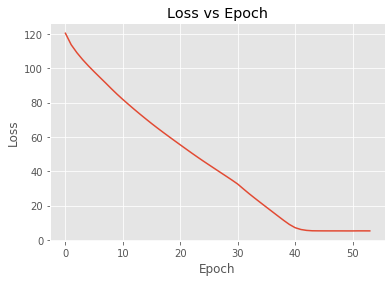

In [338]:
plt.plot(NN_model_2.history.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [325]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(X_test_featurised)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,117.545000,107.700000,109.650222,108.788649,110.275000,108.469524,107.386667,109.804000,109.158947,109.826047,...,111.619000,108.572558,111.528182,116.746667,108.849302,109.045714,92.718000,112.241538,84.511667,110.924318
1,100.145556,95.648889,93.253455,95.821500,89.859167,94.859310,99.720000,88.894000,92.031613,95.257193,...,92.978462,94.153684,92.920000,97.900000,95.488947,87.940000,92.718000,90.972000,94.536000,93.340000
2,117.545000,113.633846,109.650222,108.788649,110.275000,108.469524,118.484000,119.910000,109.158947,109.826047,...,114.915625,108.572558,111.528182,124.543333,108.849302,116.860000,129.190000,112.241538,112.383333,110.924318
3,107.181250,107.700000,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,114.915625,108.572558,111.528182,105.510000,108.849302,116.860000,107.682308,112.241538,112.383333,110.924318
4,99.788571,120.735000,109.650222,108.788649,110.275000,108.469524,107.386667,109.804000,109.158947,109.826047,...,111.619000,108.572558,111.528182,116.746667,108.849302,116.860000,129.190000,112.241538,107.841667,110.924318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,117.545000,120.756667,109.650222,108.788649,110.275000,108.469524,107.386667,119.910000,109.158947,109.826047,...,114.915625,108.572558,119.520000,124.543333,108.849302,109.045714,107.682308,116.607500,112.383333,110.924318
3324,99.788571,106.858889,109.650222,108.788649,102.716923,108.469524,101.488889,99.977500,109.158947,109.826047,...,98.956667,108.572558,100.652222,102.428750,108.849302,103.497857,101.358462,99.260000,99.767857,110.924318
3325,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,95.977097,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000
3326,91.590000,87.246667,93.253455,88.491818,93.361818,94.859310,97.170000,96.001667,95.977097,95.257193,...,95.005000,94.153684,92.920000,96.631667,95.488947,94.338000,87.732857,94.956923,89.788333,93.340000


In [326]:
r2_score(Y_test,NN_model.predict(evalue_df))

0.5784041715414805

In [327]:
## creating the dataframe to pass the metaclassifier
evalue_df = pd.DataFrame()

for i in range(num_of_samples):

    evalue_df['Model'+str(i+1)] = model_dic["Model"+str(i+1)].predict(submission_df)

evalue_df

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,...,Model291,Model292,Model293,Model294,Model295,Model296,Model297,Model298,Model299,Model300
0,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000
1,101.850000,89.788182,93.253455,100.299524,89.859167,94.859310,89.545000,96.001667,92.031613,95.257193,...,92.978462,94.153684,88.227692,99.737500,95.488947,93.540769,87.732857,89.227273,100.412500,93.340000
2,91.590000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,94.956923,84.511667,93.340000
3,78.174000,80.417500,93.253455,88.491818,78.423750,94.859310,76.413333,78.746000,92.031613,95.257193,...,98.956667,94.153684,75.052500,75.722500,95.488947,80.226000,78.913333,79.560000,84.511667,93.340000
4,116.000000,107.700000,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,111.619000,108.572558,107.300000,112.155556,108.849302,109.045714,119.035000,122.825000,112.383333,110.924318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,99.788571,106.858889,109.650222,108.788649,102.716923,108.469524,101.488889,99.977500,109.158947,109.826047,...,98.956667,108.572558,100.652222,102.428750,108.849302,103.497857,101.358462,104.246667,109.890000,110.924318
4205,98.605000,89.788182,93.253455,88.491818,97.517500,94.859310,95.122500,98.371667,95.977097,95.257193,...,92.978462,94.153684,92.920000,97.365000,95.488947,94.338000,94.847273,89.227273,89.788333,93.340000
4206,89.293333,92.520000,93.253455,95.821500,90.715000,94.859310,92.328333,88.894000,95.977097,95.257193,...,101.319000,94.153684,92.098000,98.860000,95.488947,92.991429,103.739091,89.227273,97.820000,93.340000
4207,107.181250,120.756667,109.650222,108.788649,110.275000,108.469524,106.982857,106.198333,109.158947,109.826047,...,114.915625,108.572558,107.300000,105.510000,108.849302,112.614000,107.682308,108.587143,112.383333,110.924318


In [329]:
Y_pred_NN  = NN_model_2.predict(evalue_df)

In [330]:
y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_NN

y_final.to_csv('submission_modelling_11.csv', index= False)

In [343]:
print('THe Public score {} and Private score {} for NN Regressor as metaclassifier and Decision Tree as baslearner'.format(0.49415, 0.47447))

THe Public score 0.49415 and Private score 0.47447 for NN Regressor as metaclassifier and Decision Tree as baslearner


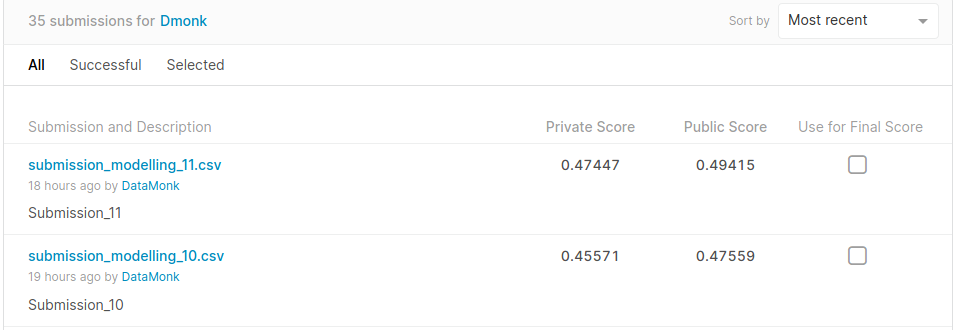

In [138]:
Image(filename = "img/kaggle_sub_10_11.png" ,width = 1000 , height = 1000 )

In [143]:
Table = PrettyTable()

row_names = ['LinearRegressor','SupportVectorRegressor','DecisonTreeRegressor','RandomForest',\
             'XGBRegressor','CatBoostRegressor','Base:DecisionTree; MetaClf: Lasso', \
             'Base:Lasso ; MetaClf: DecisionTree',\
             'Base:DecisionTree ; MetaCLf:Ridge Regressor',
            "Base: RidgeRegressor ; MetaClassifier: MLP",
            "Base: DTRegressor ; MetaClassifier: MLP"]

#Train_score = [r2, 0.79385, 0.6485, 0.6907, 0.67082]

#Test_score = [0.311465, 0.5850, 0.63929 , 0.63069, 0.63721]

Table.add_column("Model",row_names)

Table.add_column('Train R2score',[0.46057, 0.6235, 0.62529, 0.62609, 0.69075, 0.66022, 0.59762, 0.33737, 0.61493, "--","--"])

Table.add_column('Test R2score',[0.5063, 0.6025, 0.6411, 0.64588 , 0.63069, 0.63721, 0.62729, 0.41799, 0.63332,0.54681,0.57840])

Table.add_column('Public_Score',[0.41819, 0.50429, 0.54614, 0.54267, 0.52427, 0.53924, 0.53444, 0.39597, 0.52953, 0.47559, 0.49415])

Table.add_column('Private_Score',[0.40810, 0.48849, 0.54024, 0.53747, 0.51938, 0.52975, 0.51604, 0.35735, 0.52818, 0.45571, 0.47447])

print(Table)

+---------------------------------------------+---------------+--------------+--------------+---------------+
|                    Model                    | Train R2score | Test R2score | Public_Score | Private_Score |
+---------------------------------------------+---------------+--------------+--------------+---------------+
|               LinearRegressor               |    0.46057    |    0.5063    |   0.41819    |     0.4081    |
|            SupportVectorRegressor           |     0.6235    |    0.6025    |   0.50429    |    0.48849    |
|             DecisonTreeRegressor            |    0.62529    |    0.6411    |   0.54614    |    0.54024    |
|                 RandomForest                |    0.62609    |   0.64588    |   0.54267    |    0.53747    |
|                 XGBRegressor                |    0.69075    |   0.63069    |   0.52427    |    0.51938    |
|              CatBoostRegressor              |    0.66022    |   0.63721    |   0.53924    |    0.52975    |
|      Bas

## Observation and Conclusion:

    From above table, by looking at Public and Private score Decision Tree By far is the best model with 0.54614 as Public and 0.54024 as Private score.

